# Problem Statement

Nowadays, shopping malls and Big Marts keep track of individual item sales data in
order to forecast future client demand and adjust inventory management. In a data
warehouse, these data stores hold a significant amount of consumer information and
particular item details. By mining the data store from the data warehouse, more
anomalies and common patterns can be discovered.

**Feature Data**

Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : The % of total display area of all products in a store allocated to the particular product

Item_Type : The category to which the product belongs

Item_MRP : Maximum Retail Price (list price) of the product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : The year in which store was established

Outlet_Size : The size of the store in terms of ground area covered

Outlet_Location_Type : The type of city in which the store is located

Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of the product in the particular store.

**IMPORTING LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


**Data Cleaning**

In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [10]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

In [12]:
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


<ipython-input-12-a2fd9ee81ae9>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = train.select_dtypes(include =[np.object])


In [13]:
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


<ipython-input-13-1d3ba2cb956d>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = test.select_dtypes(include =[np.object])


In [14]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Data Cleaning
IN ORDER TO DEAL WITH THE MISSING VALUES

Mean --> average

The Mean value of a dataset is the average value i.e. a number around which a whole data is spread out. All values used in calculating the average are weighted equally when defining the Mean

In this case, in order to convert the missing values in the numerical column, we use mean of that particular column

Mode --> most repeated value

The mode is the value that appears most frequently in a data set. A set of data may have one mode, more than one mode, or no mode at all.The mode can be the same value as the mean and/or median, but this is usually not the case.

In this case, in order to convert the missing values in the categorical feature, we use the mode of that particular column

In [16]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [17]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(1463, 976)

<AxesSubplot:xlabel='Item_Weight'>

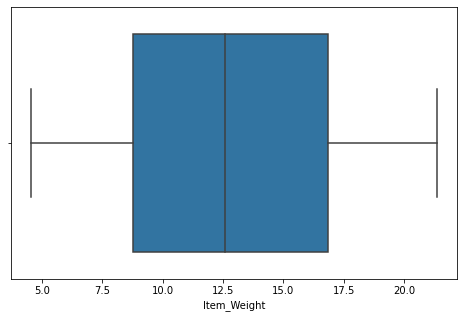

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

<AxesSubplot:xlabel='Item_Weight'>

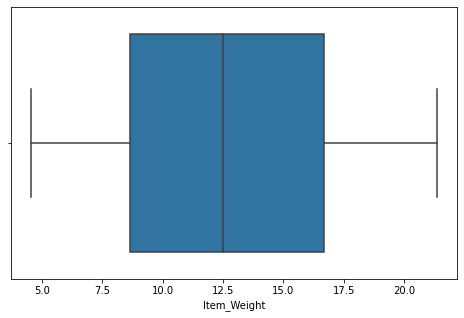

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

In [20]:
train["Item_Weight"]=train["Item_Weight"].fillna(train["Item_Weight"].mean())
test["Item_Weight"]=test["Item_Weight"].fillna(test["Item_Weight"].mean())

In [21]:
train["Item_Weight"].isnull().sum(),test["Item_Weight"].isnull().sum()

(0, 0)

In [22]:
train["Outlet_Size"]=train["Outlet_Size"].fillna(train["Outlet_Size"].mode())
test["Outlet_Size"]=test["Outlet_Size"].fillna(test["Outlet_Size"].mode())

In [23]:
train["Outlet_Size"].isnull().sum(),test["Outlet_Size"].isnull().sum()

(2410, 1606)

In [24]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [25]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

In [26]:
train["Outlet_Size"]=train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])
test["Outlet_Size"]=test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0])

In [27]:
train["Outlet_Size"].isnull().sum(),test["Outlet_Size"].isnull().sum()

(0, 0)

**Exploratory Data Analysis**

In [28]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [29]:
train["Item_Fat_Content"].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
test["Item_Fat_Content"].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [30]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2020 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2020 - x)

In [31]:
train["Item_Fat_Content"].value_counts()
#Now it looks Good and Proper Format

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**DATA VISUALIZATION**

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

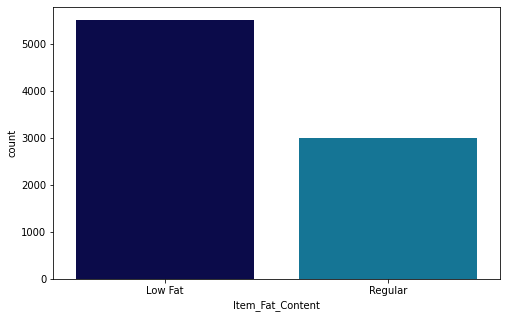

In [32]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

**Observation** LowFat Item is most sales

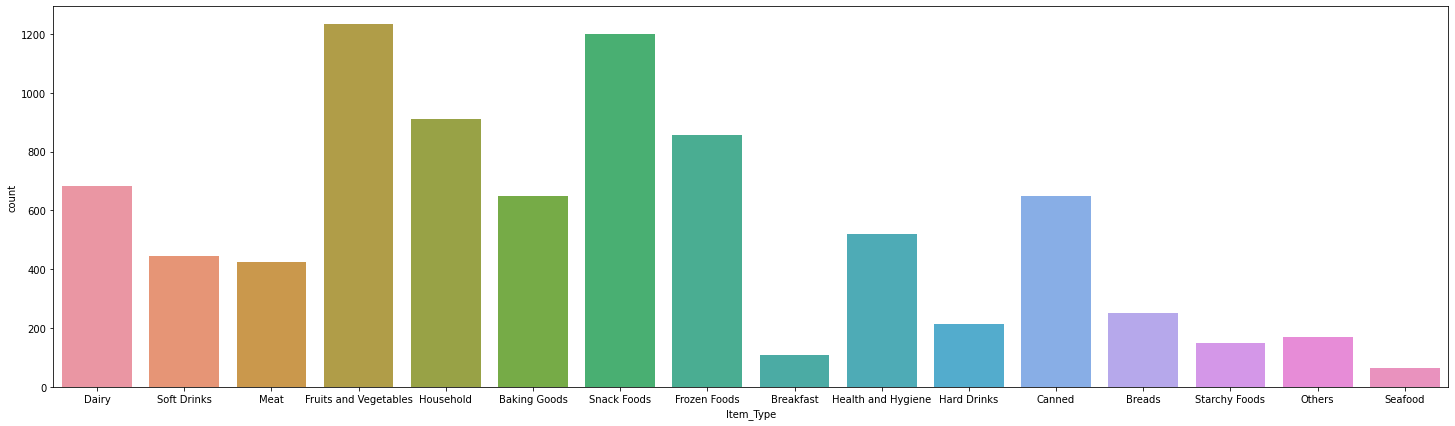

In [33]:
# Item_Type column
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=train)
plt.show()

**Observation**

- Fruits and Vegis, Snack Foods have good sales
- Household and Frozen foods also have good sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

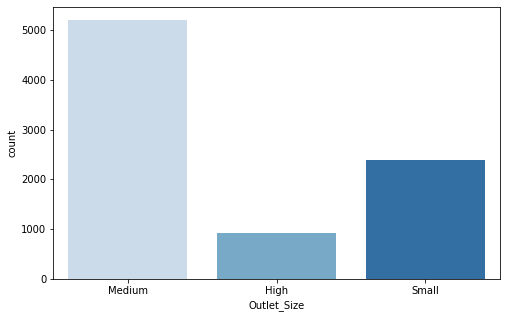

In [34]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,palette='Blues')

Observation

- Medium outlet_Size are more number of outlet, Hight Outlet have low number
- Based on observation that Hight outlet size have more maintaiance and hight captial investment required so their count is vary low

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

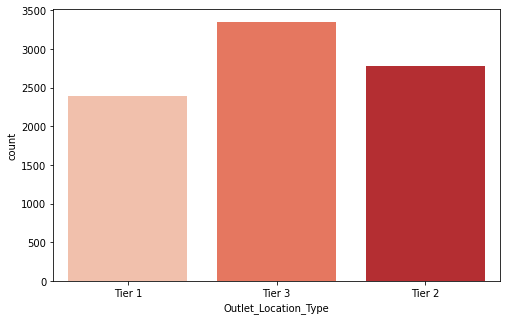

In [35]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='Reds')

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

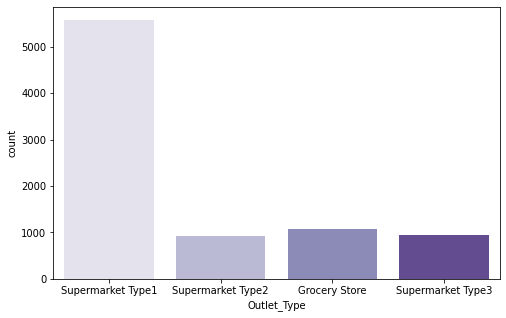

In [36]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='Purples')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

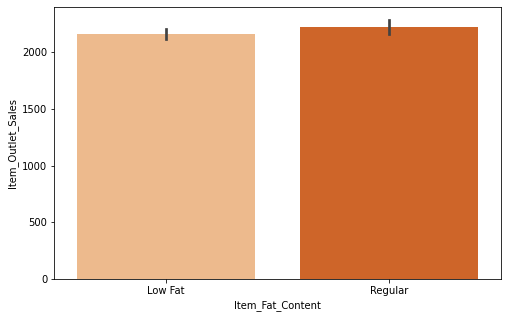

In [37]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train,palette='Oranges')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

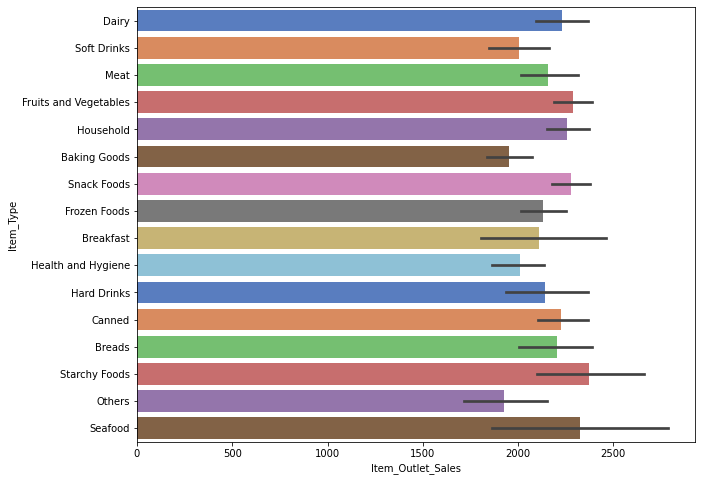

In [38]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='muted')

Obersvation -
The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

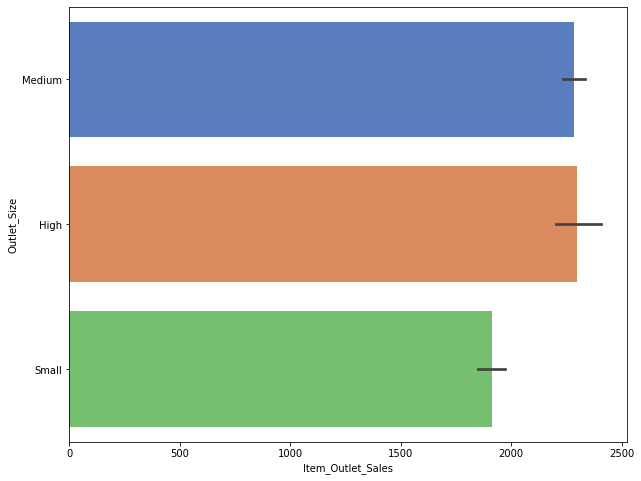

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(y='Outlet_Size',x='Item_Outlet_Sales',data=train,palette='muted')

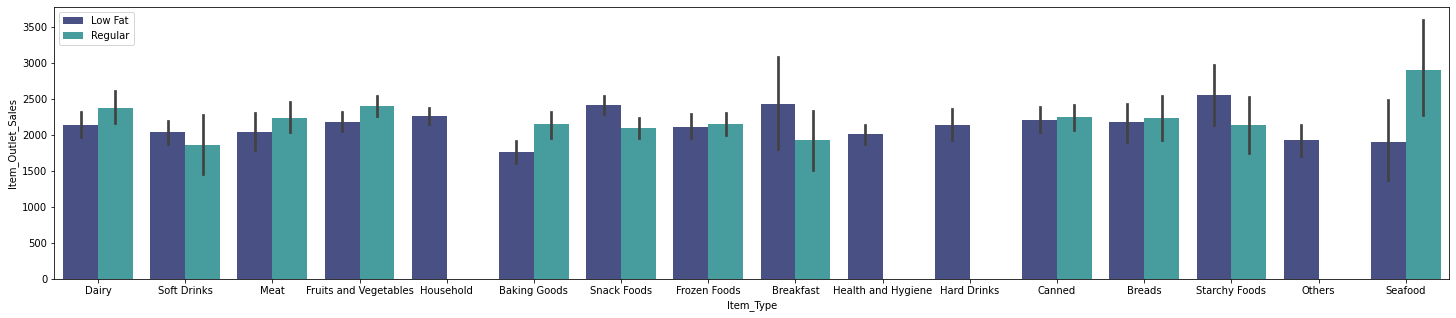

In [40]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.legend()

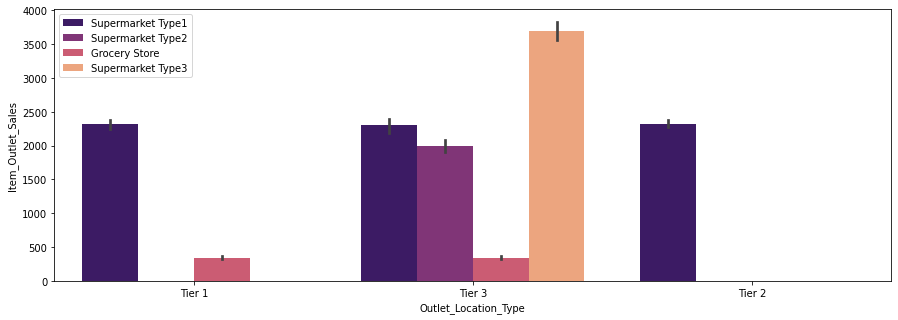

In [41]:
plt.figure(figsize=(15,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

**Feature Engineering**
LABEL ENCODING:

Label Encoding refers to the convertion of the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In simple terms, taking all the categorical values & transforming them into some numerical values

In [67]:
encoder = LabelEncoder()

In [43]:
var = ['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var:
    train[i] = encoder.fit_transform(train[i])
    
for i in var:
    test[i] = encoder.fit_transform(test[i])

In [44]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,21
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,11
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,21
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,22
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,33


In [45]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [46]:
X= train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']]
Y= train['Item_Outlet_Sales']

**Train Test Split**

In [47]:
##Train Test Split
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

**Standarization**

In [49]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [50]:
X_train_std= sc.fit_transform(X_train)

In [51]:
X_test_std= sc.transform(X_test)

In [52]:
X_train_std


array([[ 1.52290029, -0.74155088,  0.68469729, ...,  1.08786619,
        -0.25964107,  1.28565197],
       [-1.23985603, -0.74155088, -0.09514748, ..., -0.13870429,
        -0.25964107, -1.10135721],
       [ 1.54667616,  1.34852514, -0.00838589, ..., -0.13870429,
        -0.25964107, -1.10135721],
       ...,
       [-0.08197107, -0.74155088, -0.9191623 , ..., -1.36527477,
        -0.25964107,  0.09214738],
       [-0.74888428,  1.34852514,  1.21363058, ..., -0.13870429,
        -0.25964107, -1.10135721],
       [ 0.67885683, -0.74155088,  1.83915356, ...,  1.08786619,
         0.98524841, -1.34005813]])

In [53]:
X_test_std

array([[-0.43860915, -0.74155088, -0.21609255, ...,  1.08786619,
         0.98524841, -1.34005813],
       [ 1.22570189, -0.74155088, -0.52943461, ...,  1.08786619,
        -0.25964107,  1.28565197],
       [-1.21845775,  1.34852514,  0.16277342, ..., -1.36527477,
        -0.25964107,  0.09214738],
       ...,
       [ 0.65508096, -0.74155088,  0.87824237, ...,  1.08786619,
        -1.50453056, -0.02720308],
       [ 1.01171904, -0.74155088, -1.28409256, ...,  1.08786619,
         0.98524841, -1.34005813],
       [-1.56558548,  1.34852514, -1.09265374, ..., -0.13870429,
        -0.25964107, -0.50460492]])

In [54]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [55]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

In [56]:
import joblib

In [57]:
joblib.dump(sc, 'sc1.sav')

['sc1.sav']

**Model Building**

In [58]:
from xgboost import XGBRegressor
regressor = XGBRegressor()

In [59]:
#fit the model
#Training data is in X_train and the corresponding price value is in the Y_train
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
sales_data_prediction = regressor.predict(X_train)

In [61]:
# In order to check the performance of the model we find the R squared Value
r2_sales = metrics.r2_score(Y_train, sales_data_prediction)
print('R Squared value = ', r2_sales)

R Squared value =  0.8528588471912233


In [62]:
# prediction on test data
data_prediction = regressor.predict(X_test)

In [63]:
# R squared Value
r2_data = metrics.r2_score(Y_test, data_prediction)


In [64]:
print('R Squared value = ', r2_data)

R Squared value =  0.5301904229890263


In [65]:
joblib.dump(regressor,'regressor.sav')

['regressor.sav']

In [66]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
